### Realtime Object Detection

Detects objects in realtime video streaming via webcam using pretrained model

#### Import libraries for preprocessing and annotation

In [33]:
import numpy as np
import cv2
from pathlib import Path
from IPython.display import Image
import torch

#### Load pretrained models

In [34]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-11 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#### Run object detection on example image

In [35]:
#imgs = ['https://ultralytics.com/images/zidane.jpg']
imgs = ['https://cdn.pixabay.com/photo/2015/06/12/18/26/team-807300_960_720.jpg']
Image(url=imgs[0])

In [36]:
results = model(imgs)
results.print()
results.save(".")

image 1/1: 640x960 8 persons, 1 frisbee
Speed: 210.9ms pre-process, 335.1ms inference, 3.5ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to .


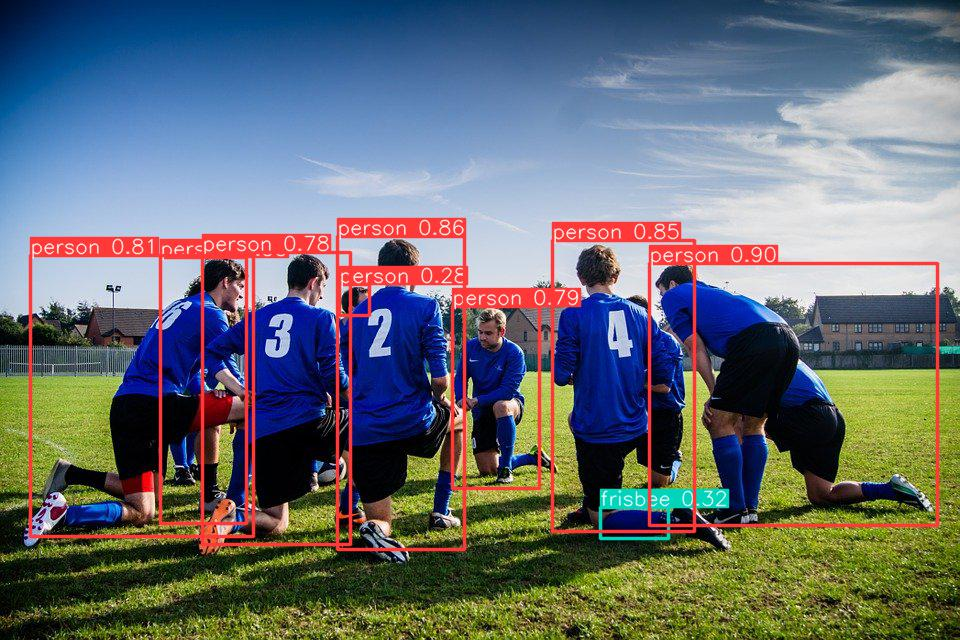

In [37]:
#Image(filename='zidane.jpg') 
#do not enter url
Image( filename= 'team-807300_960_720.jpg')

#### Run object detection on realtime video via webcam

In [38]:
cap = cv2.VideoCapture(0)
while True and image_np is not None:
    ret, image_np = cap.read()
    #pass the frame/image to the model
    #if image_np is not None:
    results = model(image_np)
    
    df_result = results.pandas().xyxy[0]
    dict_result = df_result.to_dict()
    scores = list(dict_result["confidence"].values())
    labels = list(dict_result["name"].values())
    
    list_boxes = list()
    for dict_item in df_result.to_dict('records'):
        list_boxes.append(list(dict_item.values())[:4])
    count = 0
    
    for xmin, ymin, xmax, ymax in list_boxes:
        image_np = cv2.rectangle(image_np, pt1=(int(xmin),int(ymin)), pt2=(int(xmax),int(ymax)), \
                                 color=(255,0, 0), thickness=2)
        cv2.putText(image_np, f"{labels[count]}: {round(scores[count], 2)}", (int(xmin), int(ymin)-10), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        count = count + 1
    from google.colab.patches import cv2_imshow    
    cv2_imshow('Object Detector', image_np);
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break